In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
FIG_OUTPUT_PATH = "../fig"
DATA_PATH = "../outputs"
models = os.listdir(DATA_PATH)

models

['swin_2_2024-12-09-22_33_05',
 'resnet_2_2024-12-10-02_50_30',
 'vit_2_2024-12-10-00_25_23']

In [3]:
SWIN_PATH = os.path.join(DATA_PATH, models[0])

swin_stats = ""
with open(os.path.join(SWIN_PATH, "stats.log")) as f:
    swin_stats = f.readlines()

In [4]:
RESNET_PATH = os.path.join(DATA_PATH, models[1])

resnet_stats = ""
with open(os.path.join(RESNET_PATH, "stats.log")) as f:
    resnet_stats = f.readlines()

In [5]:
ViT_PATH = os.path.join(DATA_PATH, models[2])

vit_stats = ""
with open(os.path.join(ViT_PATH, "stats.log")) as f:
    vit_stats = f.readlines()

In [6]:
def process_stats(stats_list):
    stats = {}
    for stat in stats_list:
        key, value = stat.split(":")
        stats[key.strip()] = value.strip()
    return stats

def process_training_log(file_path):
    results = []

    with open(file_path, 'r') as file:
        for line in file:
            if "Epoch [" in line:
                epoch = int(line.split('[')[1].split('/')[0].strip())

            elif "Train Loss:" in line:
                parts = line.split('|')
                train_loss = float(parts[0].split(':')[-1].strip())
                train_acc = float(parts[1].split(':')[-1].strip().replace('%', ''))

            elif "Valid Loss:" in line:
                parts = line.split('|')
                val_loss = float(parts[0].split(':')[-1].strip())
                val_acc = float(parts[1].split(':')[-1].strip().replace('%', ''))

                results.append({
                    "epoch": epoch,
                    "train_loss": train_loss,
                    "val_loss": val_loss,
                    "train_acc": train_acc,
                    "val_acc": val_acc
                })

    return results

def plot_multiple_models(x_values, y_values, labels, title, xlabel, ylabel, legend_title):
    if len(x_values) != len(y_values) or len(x_values) != len(labels):
        raise ValueError("Length of x_values, y_values, and labels must be the same.")

    plt.figure(figsize=(10, 6))

    for i in range(len(labels)):
        plt.plot(x_values[i], y_values[i], label=labels[i], marker='o')

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title=legend_title, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

    # save
    plt.savefig(os.path.join(FIG_OUTPUT_PATH, f"{title}.png"))

    plt.show()

def add_ratio_feature(df, column):
    ratio_column = f"{column}_ratio"

    df = df.copy()
    df[ratio_column] = df[column].shift(1).fillna(0)
    df[ratio_column] = df[column] / df[ratio_column]
    return df

In [7]:
swin_stats = process_stats(swin_stats)
vit_stats = process_stats(vit_stats)
resnet_stats = process_stats(resnet_stats)

swin_training_log = process_training_log(os.path.join(SWIN_PATH, "train.log"))
vit_training_log = process_training_log(os.path.join(ViT_PATH, "train.log"))
resnet_training_log = process_training_log(os.path.join(RESNET_PATH, "train.log"))

In [8]:
stats_keys = {
    "name": "Model",
    "dataset_size": "Dataset size",
    "flops": "FLOPs per instance",
    "avg_time_per_forward_pass": "Average time per forward pass",
    "training_time_per_epoch": "Training time per epoch",
    "batch_inference_latency_1": "Per batch inference latency (batch size 1)",
    "batch_inference_latency_2": "Per batch inference latency (batch size 2)",
    "batch_inference_latency_4": "Per batch inference latency (batch size 4)",
    "batch_inference_latency_8": "Per batch inference latency (batch size 8)",
    "batch_inference_latency_16": "Per batch inference latency (batch size 16)",
    "batch_inference_latency_32": "Per batch inference latency (batch size 32)",
    "batch_inference_latency_64": "Per batch inference latency (batch size 64)",
    "batch_inference_latency_128": "Per batch inference latency (batch size 128)",
    "batch_inference_latency_256": "Per batch inference latency (batch size 256)",
    "batch_gpu_memory_consumption_1": "Per batch GPU memory consumption (batch size 1)",
    "batch_gpu_memory_consumption_2": "Per batch GPU memory consumption (batch size 2)",
    "batch_gpu_memory_consumption_4": "Per batch GPU memory consumption (batch size 4)",
    "batch_gpu_memory_consumption_8": "Per batch GPU memory consumption (batch size 8)",
    "batch_gpu_memory_consumption_16": "Per batch GPU memory consumption (batch size 16)",
    "batch_gpu_memory_consumption_32": "Per batch GPU memory consumption (batch size 32)",
    "batch_gpu_memory_consumption_64": "Per batch GPU memory consumption (batch size 64)",
    "batch_gpu_memory_consumption_128": "Per batch GPU memory consumption (batch size 128)",
    "batch_gpu_memory_consumption_256": "Per batch GPU memory consumption (batch size 256)",
    "validation_loss": "Validation Loss",
    "validation_accuracy": "Validation Accuracy"
}

In [9]:
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]

In [10]:
swin_gpu_memory_consumption = [
    swin_stats[stats_keys["batch_gpu_memory_consumption_1"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_2"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_4"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_8"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_16"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_32"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_64"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_128"]],
    swin_stats[stats_keys["batch_gpu_memory_consumption_256"]]
]

vit_gpu_memory_consumption = [
    vit_stats[stats_keys["batch_gpu_memory_consumption_1"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_2"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_4"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_8"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_16"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_32"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_64"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_128"]],
    vit_stats[stats_keys["batch_gpu_memory_consumption_256"]]
]

resnet_gpu_memory_consumption = [
    resnet_stats[stats_keys["batch_gpu_memory_consumption_1"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_2"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_4"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_8"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_16"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_32"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_64"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_128"]],
    resnet_stats[stats_keys["batch_gpu_memory_consumption_256"]]
]

swin_gpu_memory_consumption = [float(x) for x in swin_gpu_memory_consumption]
vit_gpu_memory_consumption = [float(x) for x in vit_gpu_memory_consumption]
resnet_gpu_memory_consumption = [float(x) for x in resnet_gpu_memory_consumption]

In [11]:
swin_inference_latency = [
    swin_stats[stats_keys["batch_inference_latency_1"]],
    swin_stats[stats_keys["batch_inference_latency_2"]],
    swin_stats[stats_keys["batch_inference_latency_4"]],
    swin_stats[stats_keys["batch_inference_latency_8"]],
    swin_stats[stats_keys["batch_inference_latency_16"]],
    swin_stats[stats_keys["batch_inference_latency_32"]],
    swin_stats[stats_keys["batch_inference_latency_64"]],
    swin_stats[stats_keys["batch_inference_latency_128"]],
    swin_stats[stats_keys["batch_inference_latency_256"]]
]

vit_inference_latency = [
    vit_stats[stats_keys["batch_inference_latency_1"]],
    vit_stats[stats_keys["batch_inference_latency_2"]],
    vit_stats[stats_keys["batch_inference_latency_4"]],
    vit_stats[stats_keys["batch_inference_latency_8"]],
    vit_stats[stats_keys["batch_inference_latency_16"]],
    vit_stats[stats_keys["batch_inference_latency_32"]],
    vit_stats[stats_keys["batch_inference_latency_64"]],
    vit_stats[stats_keys["batch_inference_latency_128"]],
    vit_stats[stats_keys["batch_inference_latency_256"]]
]

resnet_inference_latency = [
    resnet_stats[stats_keys["batch_inference_latency_1"]],
    resnet_stats[stats_keys["batch_inference_latency_2"]],
    resnet_stats[stats_keys["batch_inference_latency_4"]],
    resnet_stats[stats_keys["batch_inference_latency_8"]],
    resnet_stats[stats_keys["batch_inference_latency_16"]],
    resnet_stats[stats_keys["batch_inference_latency_32"]],
    resnet_stats[stats_keys["batch_inference_latency_64"]],
    resnet_stats[stats_keys["batch_inference_latency_128"]],
    resnet_stats[stats_keys["batch_inference_latency_256"]]
]

swin_inference_latency = [float(x) for x in swin_inference_latency]
vit_inference_latency = [float(x) for x in vit_inference_latency]
resnet_inference_latency = [float(x) for x in resnet_inference_latency]

In [12]:
num_batches = 50000/32

swin_flops_per_instance = float(swin_stats[stats_keys["flops"]])
vit_flops_per_instance = float(vit_stats[stats_keys["flops"]])
resnet_flops_per_instance = float(resnet_stats[stats_keys["flops"]])

swin_flops = [(swin_flops_per_instance * x)/1e9 for x in batch_sizes]
vit_flops = [(vit_flops_per_instance * x)/1e9 for x in batch_sizes]
resnet_flops = [(resnet_flops_per_instance * x)/1e9 for x in batch_sizes]

swin_flops_10e = [(swin_flops_per_instance * epoch * num_batches)/1e9 for epoch in range(1, 11)]
vit_flops_for_10e = [(vit_flops_per_instance * epoch * num_batches)/1e9 for epoch in range(1, 11)]
resnet_flops_10e = [(resnet_flops_per_instance * epoch * num_batches)/1e9 for epoch in range(1, 11)]

In [13]:
swin_val_losses = [float(x["val_loss"]) for x in swin_training_log][:10]
vit_val_losses = [float(x["val_loss"]) for x in vit_training_log][:10]
resnet_val_losses = [float(x["val_loss"]) for x in resnet_training_log][:10]

swin_val_accs = [float(x["val_acc"]) for x in swin_training_log][:10]
vit_val_accs = [float(x["val_acc"]) for x in vit_training_log][:10]
resnet_val_accs = [float(x["val_acc"]) for x in resnet_training_log][:10]

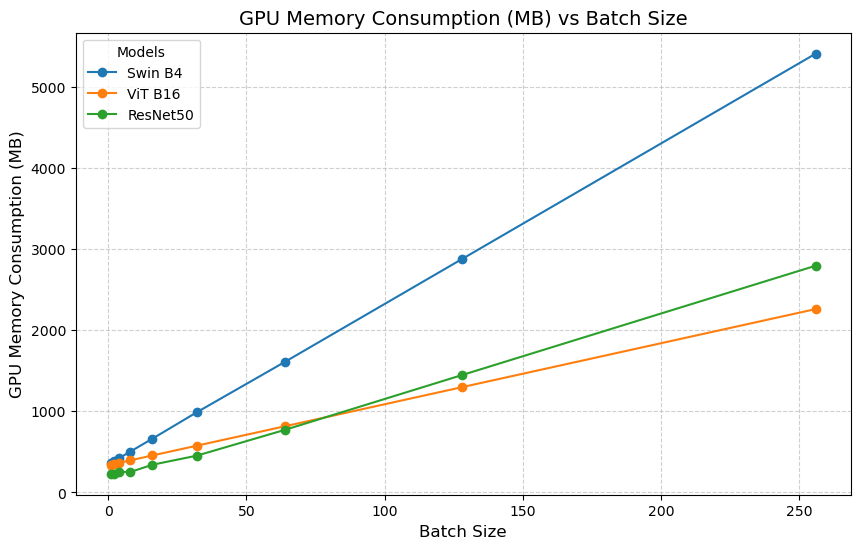

In [14]:
x_gpu_memory = [
    batch_sizes,
    batch_sizes,
    batch_sizes
]
y_gpu_memory = [
    swin_gpu_memory_consumption,
    vit_gpu_memory_consumption,
    resnet_gpu_memory_consumption
]
labels = ["Swin B4", "ViT B16", "ResNet50"]

plot_multiple_models(
    x_values=x_gpu_memory,
    y_values=y_gpu_memory,
    labels=labels,
    title="GPU Memory Consumption (MB) vs Batch Size",
    xlabel="Batch Size",
    ylabel="GPU Memory Consumption (MB)",
    legend_title="Models"
)

In [15]:
resnet_inference_latency

[151.01580810546875,
 47.66579055786133,
 42.961727142333984,
 43.294368743896484,
 43.982975006103516,
 47.05436706542969,
 52.98735809326172,
 88.40806579589844,
 168.2761993408203]

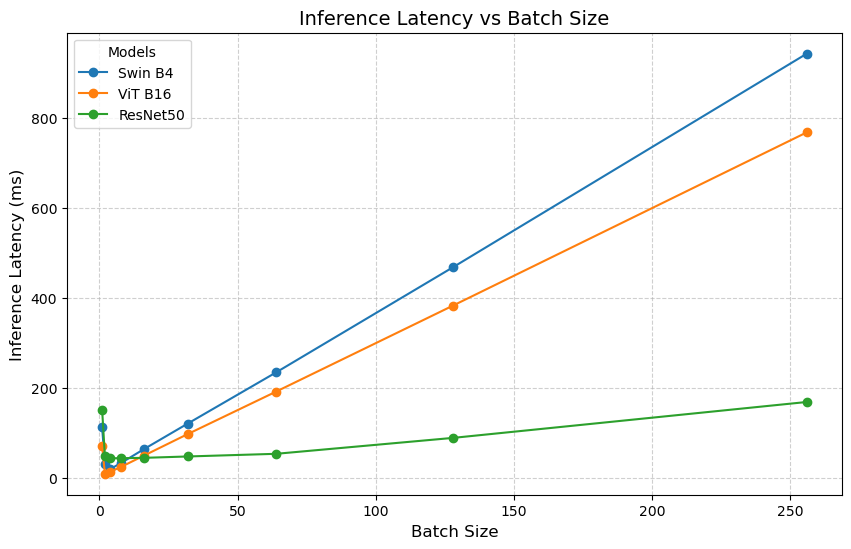

In [16]:
x_inference_latency = [
    batch_sizes,
    batch_sizes,
    batch_sizes
]
y_inference_latency = [
    swin_inference_latency,
    vit_inference_latency,
    resnet_inference_latency
]

plot_multiple_models(
    x_values=x_inference_latency,
    y_values=y_inference_latency,
    labels=labels,
    title="Inference Latency vs Batch Size",
    xlabel="Batch Size",
    ylabel="Inference Latency (ms)",
    legend_title="Models"
)
    

In [17]:
len(swin_flops_10e), len(vit_flops_for_10e), len(resnet_flops_10e), len(swin_val_losses), len(vit_val_losses), len(resnet_val_losses)

(10, 10, 10, 10, 10, 10)

In [18]:
resnet_val_losses

[0.6916, 0.5889, 0.614, 0.6407, 0.6598, 0.6825, 0.6999, 0.7845, 0.7447, 0.7494]

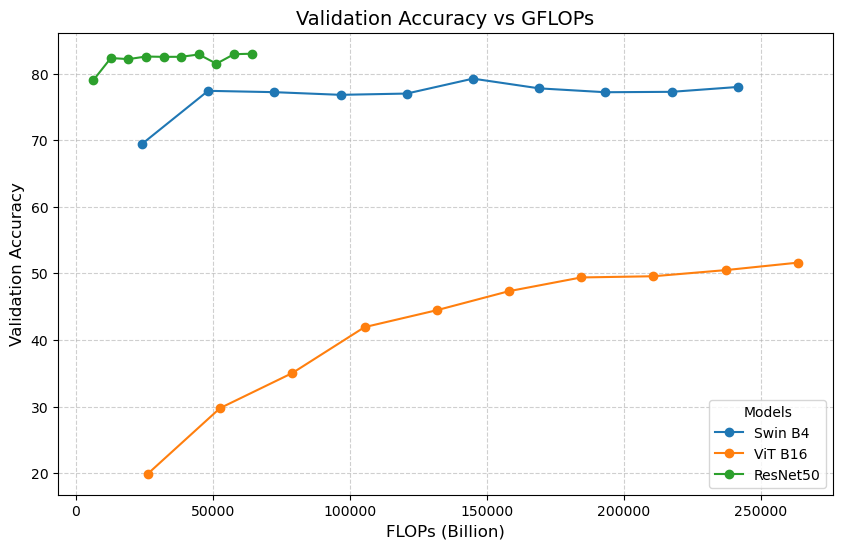

In [19]:
X_val_loss = [
    swin_flops_10e,
    vit_flops_for_10e,
    resnet_flops_10e
]

y_val_loss = [
    swin_val_accs,
    vit_val_accs,
    resnet_val_accs
]

plot_multiple_models(
    x_values=X_val_loss,
    y_values=y_val_loss,
    labels=labels,
    title="Validation Accuracy vs GFLOPs",
    xlabel="FLOPs (Billion)",
    ylabel="Validation Accuracy",
    legend_title="Models"
)

In [20]:
len(swin_gpu_memory_consumption), len(vit_gpu_memory_consumption), len(resnet_gpu_memory_consumption)

(9, 9, 9)

In [21]:
data = {
    "Model": ["Swin B4"]*9 + ["ViT B16"]*9 + ["ResNet50"]*9,
    "batch_size": batch_sizes + batch_sizes + batch_sizes,
    "inference_latency_ms": swin_inference_latency + vit_inference_latency + resnet_inference_latency,
    "GPU_memory_consumption_MB": swin_gpu_memory_consumption + vit_gpu_memory_consumption + resnet_gpu_memory_consumption,
    "GFLOPs": swin_flops + vit_flops + resnet_flops,
}

df = pd.DataFrame(data)
df.head(100)

,Model,batch_size,inference_latency_ms,GPU_memory_consumption_MB,GFLOPs
0,Swin B4,1,112.144958,369.0,15.466905
1,Swin B4,2,29.392000,386.0,30.933809
2,Swin B4,4,19.286816,424.0,61.867618
3,Swin B4,8,33.108864,504.0,123.735237
4,Swin B4,16,62.912254,663.0,247.470473
5,Swin B4,32,120.322243,987.0,494.940946
6,Swin B4,64,234.283813,1610.0,989.881893
7,Swin B4,128,468.238892,2875.0,1979.763786
8,Swin B4,256,943.388184,5405.0,3959.527571
9,ViT B16,1,70.571777,343.0,16.866722


In [22]:
df_vit = df[df["Model"] == "ViT B16"].reset_index(drop=True)
df_resnet = df[df["Model"] == "ResNet50"].reset_index(drop=True)
df_swin = df[df["Model"] == "Swin B4"].reset_index(drop=True)

In [23]:


df_vit = add_ratio_feature(df_vit, "inference_latency_ms")
df_resnet = add_ratio_feature(df_resnet, "inference_latency_ms")
df_swin = add_ratio_feature(df_swin, "inference_latency_ms")

df_vit = add_ratio_feature(df_vit, "GPU_memory_consumption_MB")
df_resnet = add_ratio_feature(df_resnet, "GPU_memory_consumption_MB")
df_swin = add_ratio_feature(df_swin, "GPU_memory_consumption_MB")

In [24]:
df_resnet

,Model,batch_size,inference_latency_ms,GPU_memory_consumption_MB,GFLOPs,inference_latency_ms_ratio,GPU_memory_consumption_MB_ratio
0,ResNet50,1,151.015808,231.0,4.109669,inf,inf
1,ResNet50,2,47.665791,232.0,8.219339,0.315634,1.004329
2,ResNet50,4,42.961727,255.0,16.438678,0.901312,1.099138
3,ResNet50,8,43.294369,252.0,32.877355,1.007743,0.988235
4,ResNet50,16,43.982975,342.0,65.754710,1.015905,1.357143
5,ResNet50,32,47.054367,453.0,131.509420,1.069831,1.324561
6,ResNet50,64,52.987358,772.0,263.018840,1.126088,1.704194
7,ResNet50,128,88.408066,1446.0,526.037680,1.668475,1.873057
8,ResNet50,256,168.276199,2793.0,1052.075360,1.903403,1.931535


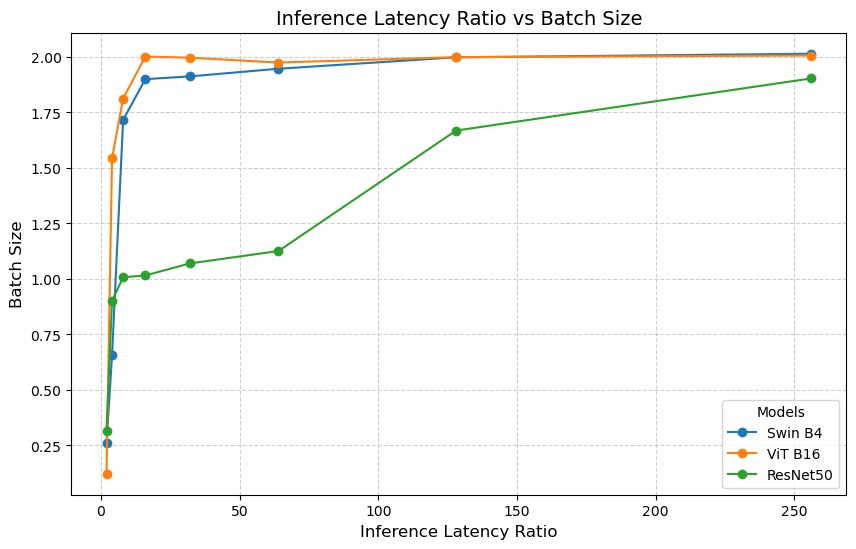

In [25]:
y_ratio = [
    df_swin["inference_latency_ms_ratio"],
    df_vit["inference_latency_ms_ratio"],
    df_resnet["inference_latency_ms_ratio"]
]

x_ratio = [
    batch_sizes, 
    batch_sizes,
    batch_sizes
]

plot_multiple_models(
    x_values=x_ratio,
    y_values=y_ratio,
    labels=labels,
    title="Inference Latency Ratio vs Batch Size",
    xlabel="Inference Latency Ratio",
    ylabel="Batch Size",
    legend_title="Models"
)

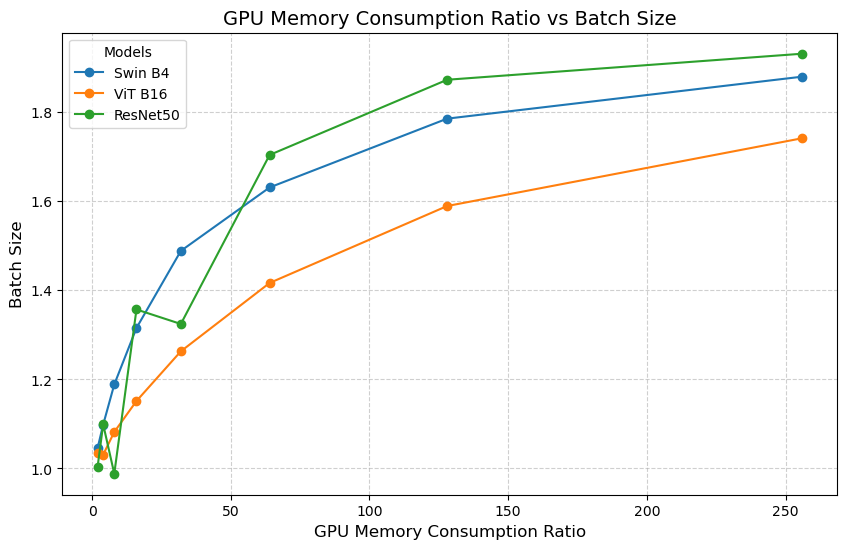

In [26]:
x_gpu_memory_ratio = [
    batch_sizes,
    batch_sizes,
    batch_sizes
]

y_gpu_memory_ratio = [
    df_swin["GPU_memory_consumption_MB_ratio"],
    df_vit["GPU_memory_consumption_MB_ratio"],
    df_resnet["GPU_memory_consumption_MB_ratio"]
]

plot_multiple_models(
    x_values=x_gpu_memory_ratio,
    y_values=y_gpu_memory_ratio,
    labels=labels,
    title="GPU Memory Consumption Ratio vs Batch Size",
    xlabel="GPU Memory Consumption Ratio",
    ylabel="Batch Size",
    legend_title="Models"
)

In [27]:
df_vit.to_csv(os.path.join(ViT_PATH, "df_vit.csv"), index=False)
df_resnet.to_csv(os.path.join(RESNET_PATH, "df_resnet.csv"), index=False)
df_swin.to_csv(os.path.join(SWIN_PATH, "df_swin.csv"), index=False)